# Over and Underfitting

### Mathematical Framework for Bias-Variance Tradeoff

#### Training Dataset
A training dataset is defined as:
$$
\mathcal{D} \coloneqq \langle (x_i, y_i) \rangle_{i=1}^N \quad \text{drawn i.i.d. from a distribution } P
$$

#### Expected Target of \( y \) Given \( x \)
The expected target is:
$$
\bar{y}(x) = \mathbb{E}_{y|x}[y] = \int y \, p(y | x) \, dy
$$

#### Estimated Prediction Model (Regression)
The machine learning model estimates a prediction function \( \hat{f}(x, \theta) \) by minimizing:
$$
\mathbb{E}_{(x, y) \sim P}\left[(\hat{f}(x, \theta) - y)^2\right] = \int_x \int_y (\hat{f}(x, \theta) - y)^2 \, p(x, y) \, dy \, dx
$$

Since \( p(x, y) \) is unknown, we approximate the error using the empirical mean:
$$
\mathbb{E}_{(x, y) \sim P}\left[(\hat{f}(x, \theta) - y)^2\right] \approx \frac{1}{N} \sum_{i=1}^N (\hat{f}(x_i, \theta) - y_i)^2
$$

The estimated model is:
$$
\hat{f}(x; \mathcal{D}) = \hat{f}(x, \theta^*)
$$

where:
$$
\theta^* = \arg \min_{\theta} \frac{1}{N} \sum_{i=1}^N (\hat{f}(x_i, \theta) - y_i)^2
$$

---

### Expected Test Error and Prediction Model

#### Expected Test Error
The expected test error of \( \hat{f}(x; \mathcal{D}) \) given a training set \( \mathcal{D} \) is:
$$
\mathbb{E}_{(x, y) \sim P}\left[(\hat{f}(x; \mathcal{D}) - y)^2\right] = \int_x \int_y (\hat{f}(x; \mathcal{D}) - y)^2 \, p(x, y) \, dy \, dx
$$

#### Expected Prediction Model
Since \( (x, y) \sim P \), the dataset \( \mathcal{D} \coloneqq \langle (x_i, y_i) \rangle_{i=1}^N \sim P^N \) is also a random variable. The expected prediction model over all sampled datasets is:
$$
\bar{f}(x) \coloneqq \mathbb{E}_{\mathcal{D} \sim P^N}[\hat{f}(x; \mathcal{D})] = \int_{\mathcal{D}} \hat{f}(x; \mathcal{D}) \, p(\mathcal{D}) \, d\mathcal{D}
$$

---

### Bias-Variance Decomposition

The expected test error of \( \hat{f}(x; \mathcal{D}) \) across training sets \( \mathcal{D} \) is:
$$
\mathbb{E}_{x, y, \mathcal{D}}\left[(\hat{f}(x; \mathcal{D}) - y)^2\right] = \int_x \int_y \int_{\mathcal{D}} (\hat{f}(x; \mathcal{D}) - y)^2 \, p(x, y) \, p(\mathcal{D}) \, d\mathcal{D} \, dy \, dx
$$

Using bias-variance decomposition:
$$
\mathbb{E}_{x, y, \mathcal{D}}\left[(\hat{f}(x; \mathcal{D}) - y)^2\right] = \mathbb{E}_{x, \mathcal{D}}\left[(\hat{f}(x; \mathcal{D}) - \bar{f}(x))^2\right] + \mathbb{E}_{x, y}\left[(\bar{f}(x) - y)^2\right]
$$

---

### Bias-Variance-Noise Tradeoff

#### Variance
The variance measures the spread of predictions across training sets:
$$
\text{Variance} = \mathbb{E}_{x, \mathcal{D}}\left[(\hat{f}(x; \mathcal{D}) - \bar{f}(x))^2\right]
$$

#### Bias
The bias measures how closely the prediction model approximates the target:
$$
\text{Bias}^2 = \mathbb{E}_{x, y}\left[(\bar{f}(x) - \bar{y}(x))^2\right]
$$

#### Noise
The noise represents the inherent variability of \( y \) given \( x \):
$$
\text{Noise} = \mathbb{E}_{x, y}\left[(\bar{y}(x) - y)^2\right]
$$

---

### Final Bias-Variance Decomposition
The total expected error is the sum of variance, bias squared, and noise:
$$
\mathbb{E}_{x, y, \mathcal{D}}\left[(\hat{f}(x; \mathcal{D}) - y)^2\right] = \text{Variance} + \text{Bias}^2 + \text{Noise}
$$

In [795]:
import numpy as np
import matplotlib.pyplot as plt
from polynomial_regression import PolynomialRegression
from sklearn.model_selection import train_test_split

In [796]:
np.random.seed(42)

In [797]:
# Target polynomial
def f(x: float) -> float:
    return 9 + 1.5*x -12.5*(x**2) - 2.5*(x**3) + 3.5*(x**4) + x**5

In [798]:
# Num of data points
N = 60

# Create noise
noise = np.random.normal(0, 2.5, N)

# Create dataset with a little bit of gaussian noise.
X = np.linspace(-3.2, 1.7, N)
y = f(X) + noise

# Create X continues for plotting functions
X_continues = np.linspace(-3.2, 1.8, 100).reshape(-1, 1)

In [799]:
# Split for Training and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Reshape X_train, X_test (sklearn)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

In [800]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (42, 1)
Shape of y_train: (42,)


In [801]:
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_test: (18, 1)
Shape of y_test: (18,)


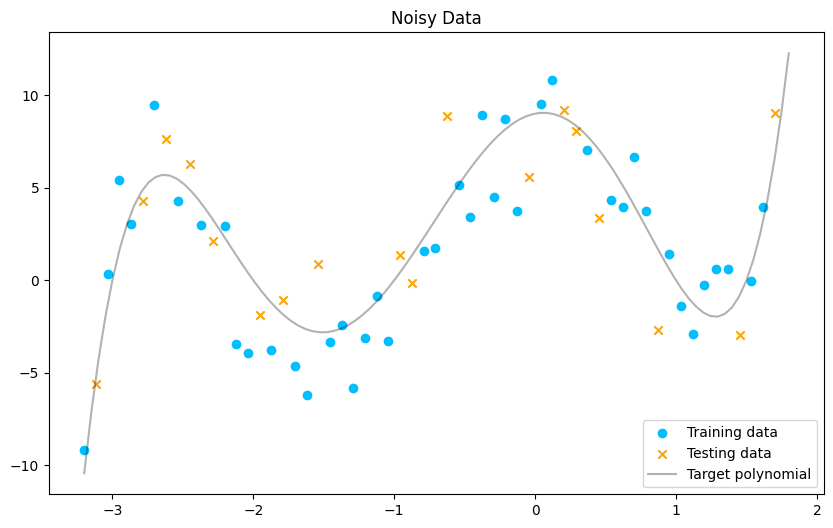

In [802]:
plt.figure(figsize=(10, 6))
plt.title('Noisy Data')
plt.scatter(X_train, y_train, color='deepskyblue', label='Training data')
plt.scatter(X_test, y_test, color='orange', marker='x', label='Testing data')
plt.plot(X_continues, f(X_continues), color='black', alpha=0.3, label='Target polynomial')
plt.legend()
plt.show()

In [803]:
# Create different polynomial models
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
models = {degree: PolynomialRegression(degree) for degree in degrees}

# Train the diffrent models
for _, model in models.items():
    model.fit(X_train, y_train)

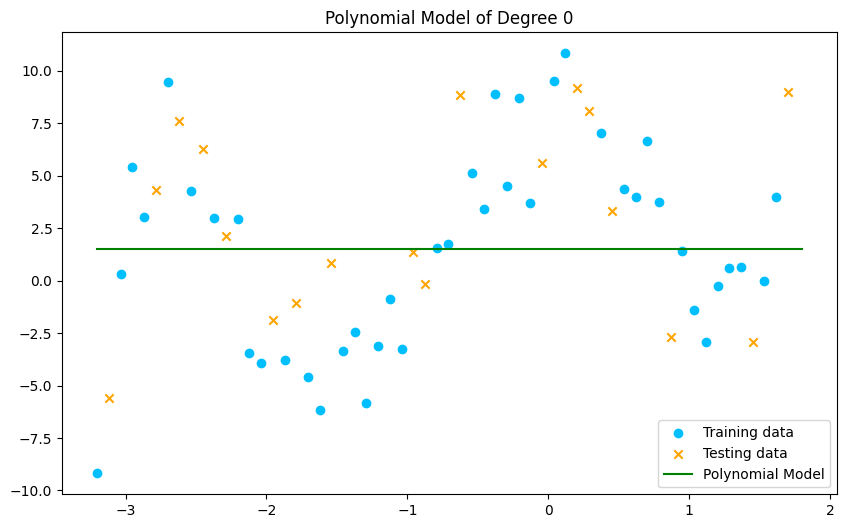

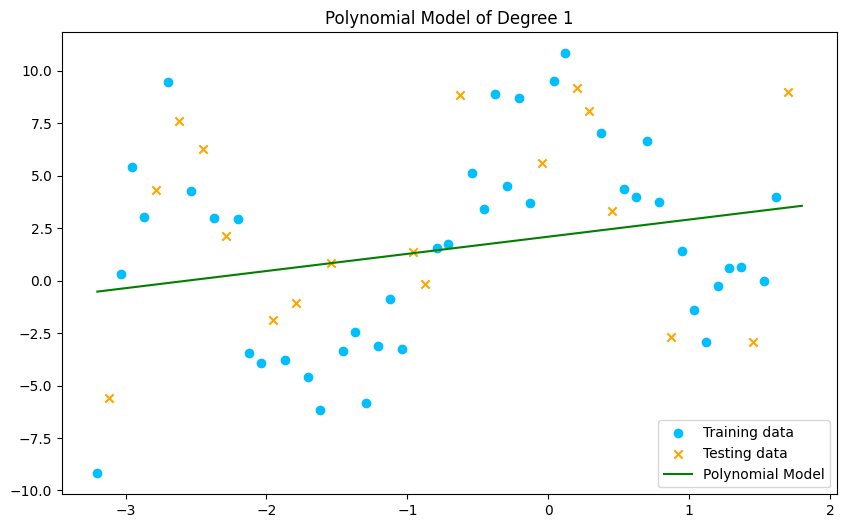

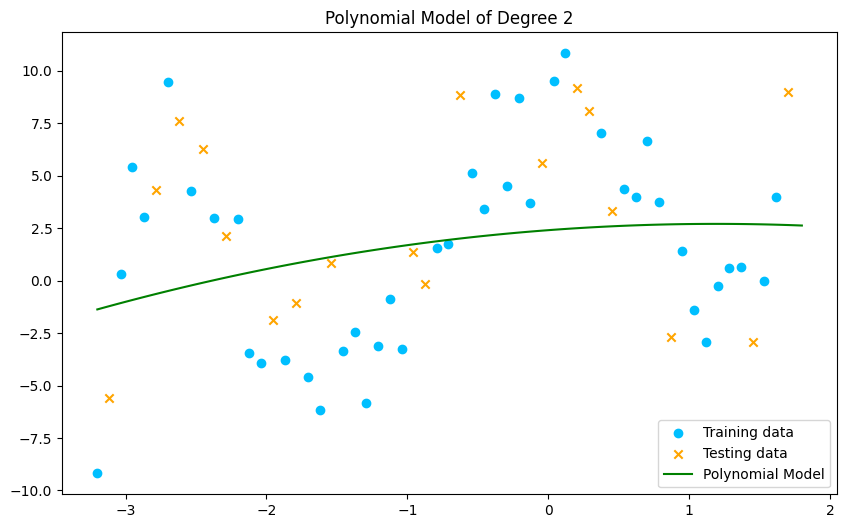

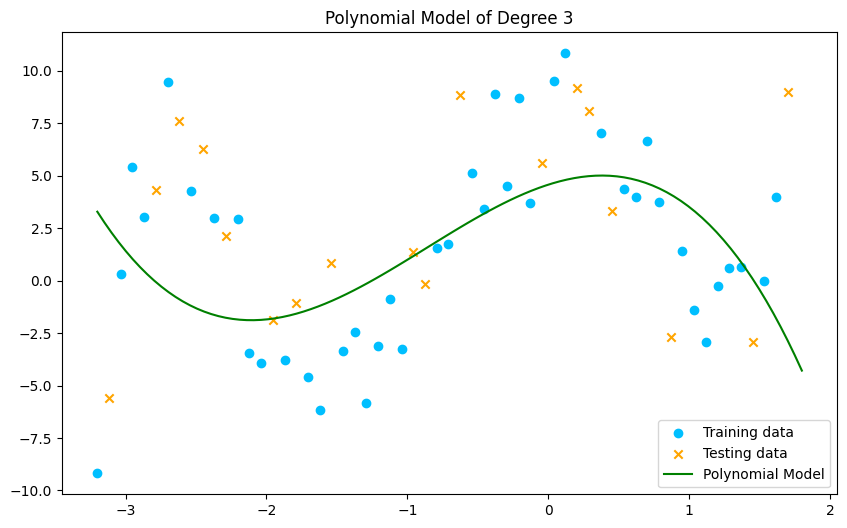

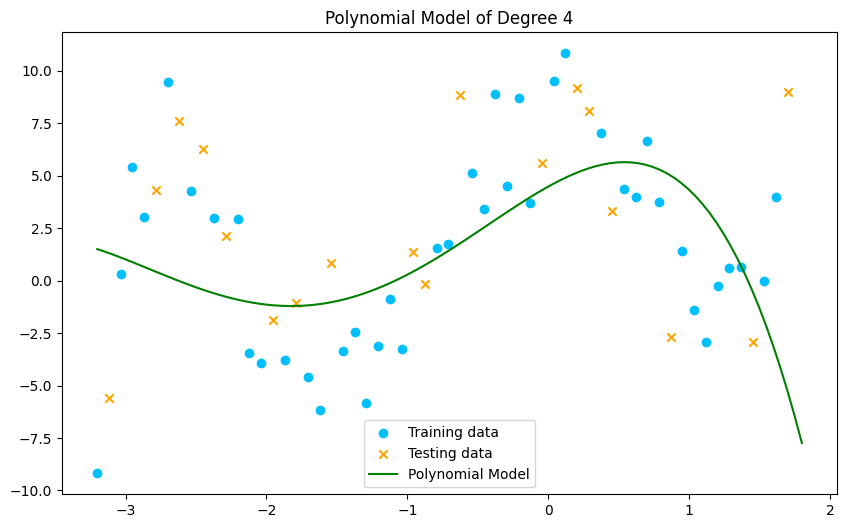

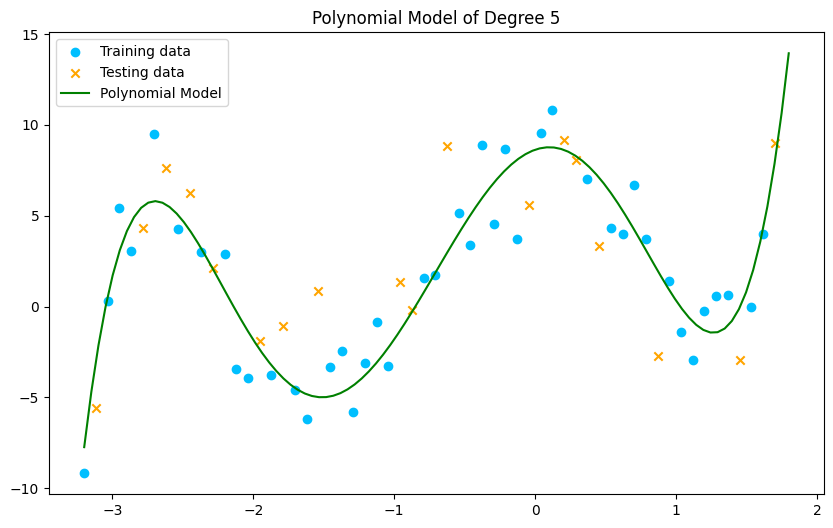

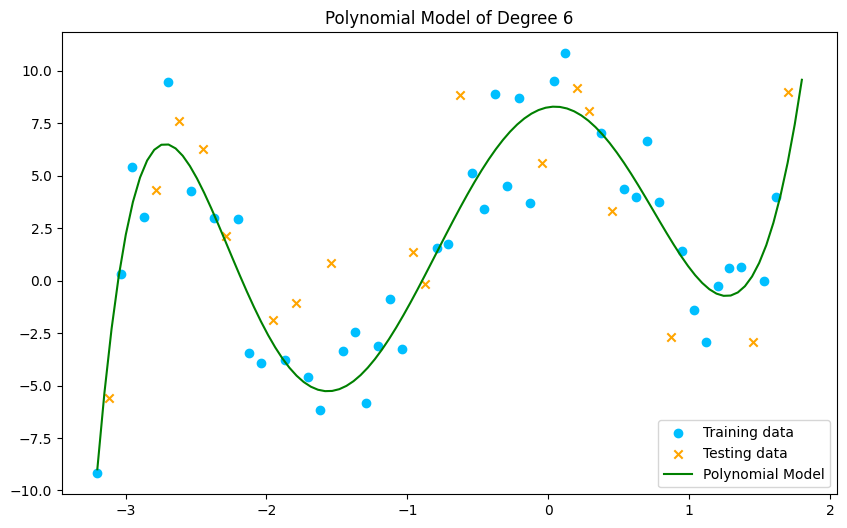

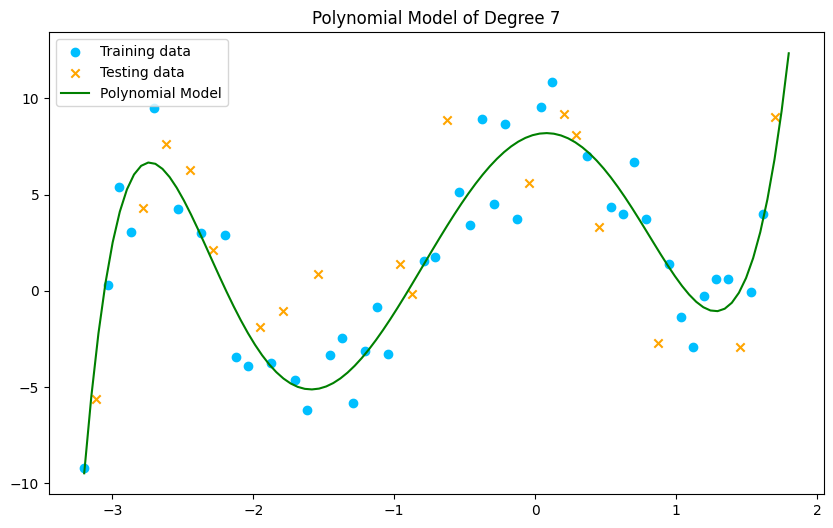

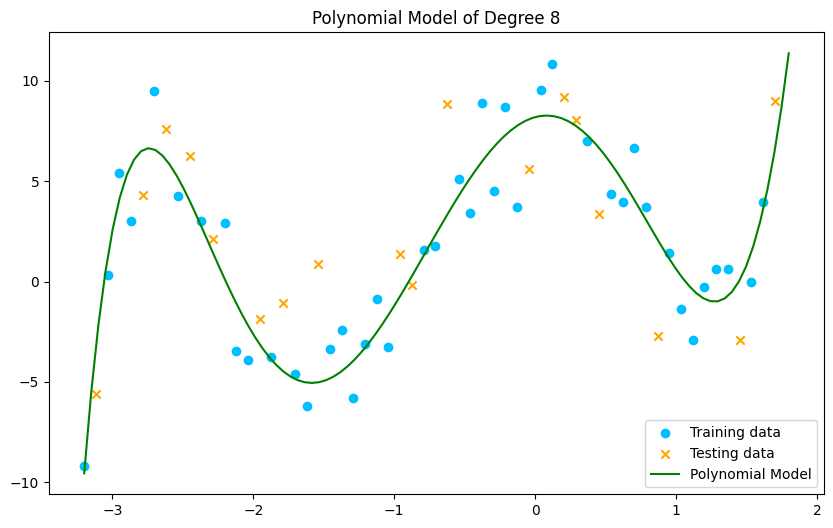

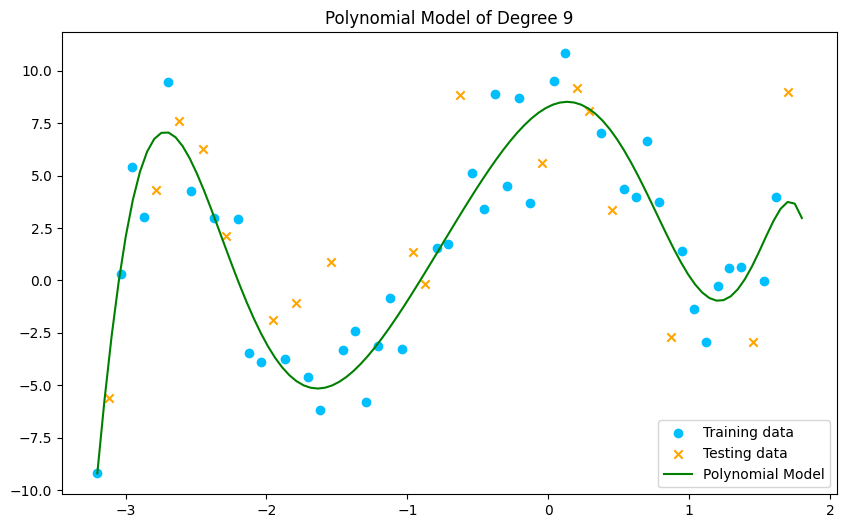

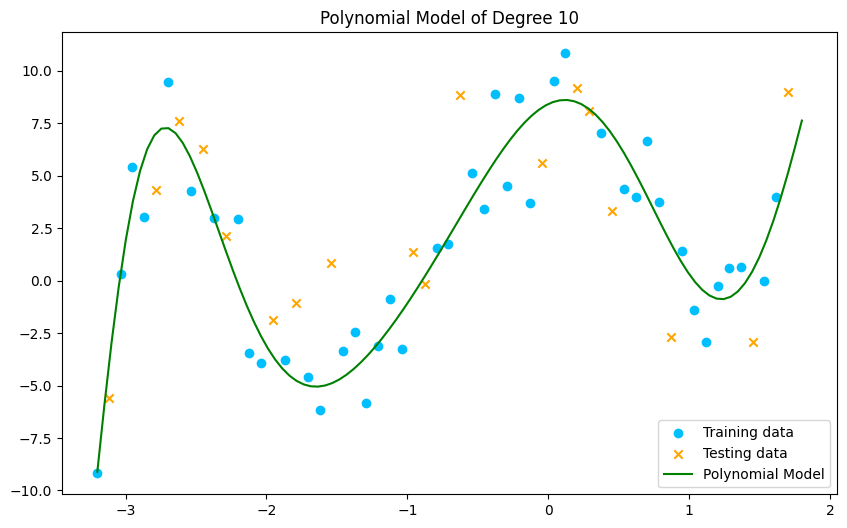

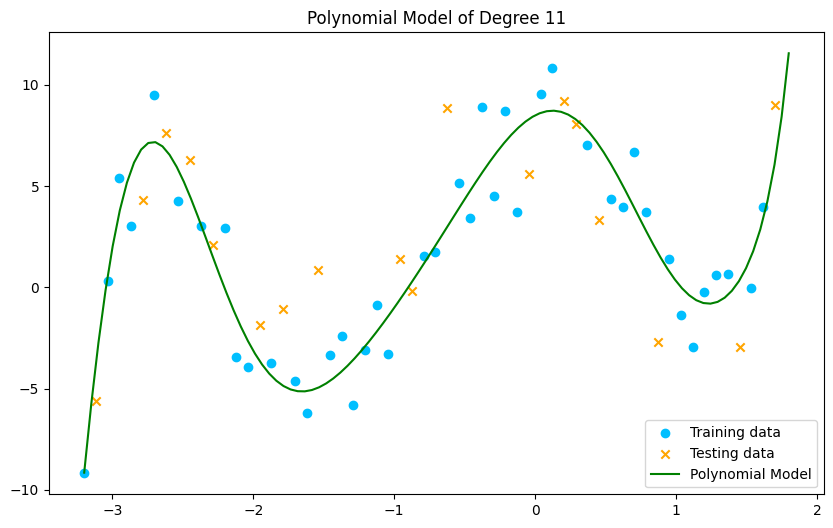

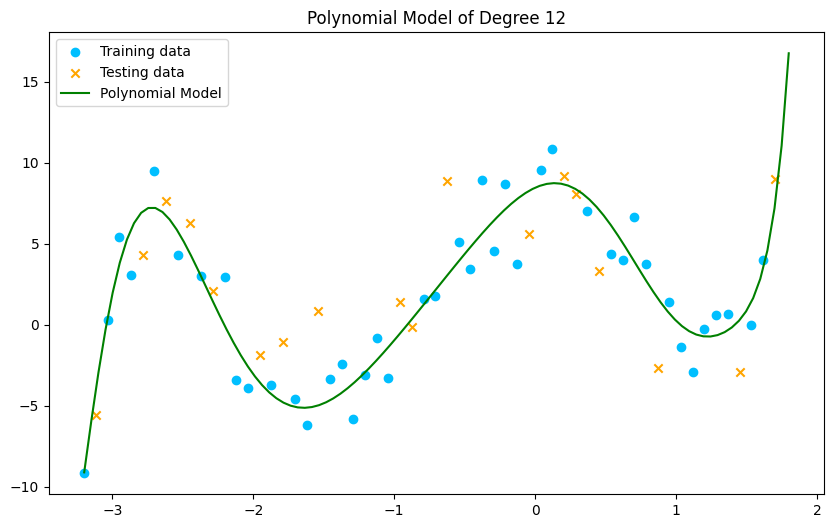

In [804]:
# Plot the different polynomial models
for d, model in models.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    y_pred = model.predict(X_continues)
    ax.set_title(f'Polynomial Model of Degree {d}')
    ax.scatter(X_train, y_train, color='deepskyblue', label='Training data')
    ax.scatter(X_test, y_test, color='orange', marker='x', label='Testing data')
    ax.plot(X_continues, y_pred, color='green', label='Polynomial Model') 
    ax.legend()

### Question: How to choose the degree d for the polynomial model?

## Steps for Bias-Variance Decomposition

#### (1) Sample with Replacement
Generate $n$ datasets $\{ \mathcal{D}_{1}^{(train)}, \dots, \mathcal{D}_{n}^{(train)} \}$ by sampling with replacement from the training dataset.

#### (2) Fit Models
Fit a model for each re-sampled dataset:
$$
f_i(x; \mathcal{D}_{i}^{(train)})
$$

#### (3) Generate Predictions
Generate predictions over the test data using each model and store them in an array:
$$
\text{pred}_{i, j} = \hat{f}(x_{i}^{(test)}; \mathcal{D}_{j}^{(train)})
$$

#### (4) Compute the Expected Prediction Model
$$
\bar{f}(x^{(test)}) = \mathbb{E}_{\mathcal{D}^{(test)} \sim P}\left[\hat{f}(x^{(test)}; \mathcal{D})\right]
$$

Which can be approximated as:
$$
\bar{f}(x^{(test)}) = \frac{1}{n} \sum_{i=1}^{n} \hat{f}(x^{(test)}; \mathcal{D}_{i}^{(train)})
$$

#### (5) Compute the Bias
The bias is given by:
$$
\text{Bias} = \mathbb{E}_{x, y}\left[\left(\bar{f}(x^{(test)}) - y^{(test)}\right)^2\right]
$$

This can be approximated as:
$$
\text{Bias} = \frac{1}{|\mathcal{D}^{(test)}|} \sum_{i=1}^{|\mathcal{D}^{(test)}|} \left(\bar{f}(x_{i}^{(test)}) - y_{i}^{(test)}\right)^2
$$

#### (6) Compute the Variance
The variance is given by:
$$
\text{Variance} = \mathbb{E}_{x, \mathcal{D}}\left[\left(\hat{f}(x; \mathcal{D}) - \bar{f}(x)\right)^2\right]
$$

This can be approximated as:
$$
\text{Variance} = \frac{1}{n \cdot |\mathcal{D}^{(test)}|} \sum_{i=1}^{|\mathcal{D}^{(test)}|} \sum_{j=1}^{n} \left(\hat{f}(x_{i}^{(test)}) - \hat{f}(x_{i}^{(test)}; \mathcal{D}_{j}^{(train)})\right)^2
$$

#### (7) Compute the Mean Squared Error (MSE)
The average MSE can be computed as:
$$
\text{MSE} = \frac{1}{n \cdot |\mathcal{D}^{(test)}|} \sum_{i=1}^{|\mathcal{D}^{(test)}|} \sum_{j=1}^{n} \left(f(x_{i}^{(test)}; \mathcal{D}_{j}^{(train)}) - y_{i}^{(test)}\right)^2
$$

In [812]:
def sample_with_replacement(X: np.array, y: np.array) -> tuple[np.array, np.array]:
    N = X.shape[0]
    indices = np.arange(N)
    idx = np.random.choice(indices, size=N, replace=True)
    return X[idx], y[idx]

In [806]:
def measure_bias_variance_mse(model: PolynomialRegression,
                              X_train: np.array,
                              y_train :np.array,
                              X_test: np.array,
                              y_test: np.array,
                              n_datasets: int=200) -> tuple[float, float, float]:
    
    all_pred = np.zeros((n_datasets, y_test.shape[0]), dtype=np.float64)
    
    for i in range(n_datasets):
        X_boot, y_boot = sample_with_replacement(X_train, y_train)
        model.fit(X_boot, y_boot)
        y_pred = model.predict(X_test) 
        all_pred[i] = y_pred

    # Expected prediction error
    mean_pred_error = np.mean(all_pred, axis=0)

    # Compute bias
    bias = np.mean((mean_pred_error - y_test) ** 2)

    # Compute variance
    variance = np.mean((mean_pred_error - all_pred) ** 2)

    # Compute mse
    mse = np.mean((all_pred - y_test) ** 2)

    return bias, variance, mse

In [807]:
# Create Polynomial regression models
models = {d: PolynomialRegression(d) for d in range(0, 10)}
degrees = models.keys()

In [808]:
# Measure bias, variance and MSE for each model
results = {d : measure_bias_variance_mse(model, X_train, y_train, X_test, y_test) for d, model in models.items()}

In [809]:
biases = [res[0] for res in results.values()]
variances = [res[1] for res in results.values()]
mses = [res[2] for res in results.values()]

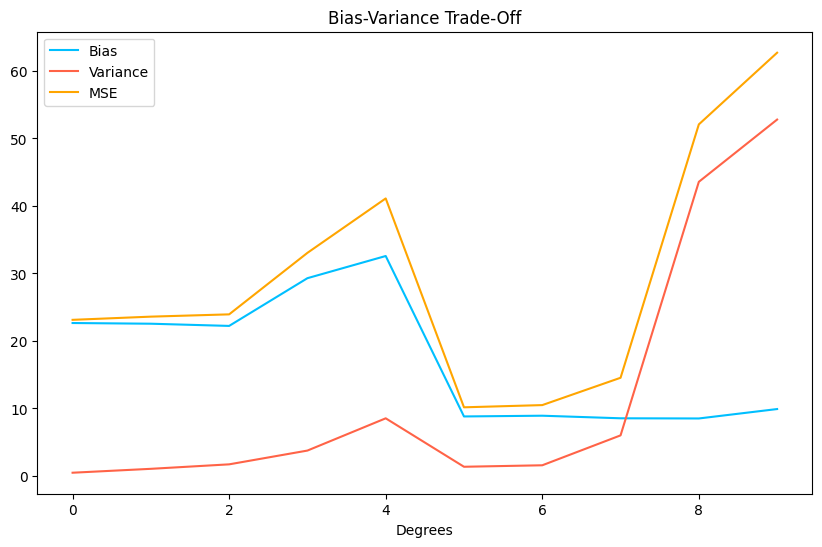

In [810]:
plt.figure(figsize=(10, 6))
plt.title('Bias-Variance Trade-Off')
plt.plot(degrees, biases, color='deepskyblue', label='Bias')
plt.plot(degrees, variances, color='tomato', label='Variance')
plt.plot(degrees, mses, color='orange', label='MSE')
plt.xlabel('Degrees')
plt.legend()
plt.show()

In [811]:
for d, (bias, var, mse) in results.items():
    print(f'Model degree: {d}\t MSE: {round(mse, 2)}\tBias: {round(bias, 2)}\tVariance: {round(var, 2)}')

Model degree: 0	 MSE: 23.12	Bias: 22.65	Variance: 0.47
Model degree: 1	 MSE: 23.59	Bias: 22.55	Variance: 1.05
Model degree: 2	 MSE: 23.93	Bias: 22.22	Variance: 1.71
Model degree: 3	 MSE: 33.04	Bias: 29.29	Variance: 3.75
Model degree: 4	 MSE: 41.11	Bias: 32.58	Variance: 8.53
Model degree: 5	 MSE: 10.16	Bias: 8.81	Variance: 1.35
Model degree: 6	 MSE: 10.49	Bias: 8.92	Variance: 1.57
Model degree: 7	 MSE: 14.54	Bias: 8.54	Variance: 6.0
Model degree: 8	 MSE: 52.08	Bias: 8.51	Variance: 43.57
Model degree: 9	 MSE: 62.69	Bias: 9.9	Variance: 52.79


## Choose model with Degree 5 :)